In [11]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

The data set had the current time missing for the first ~10 rows. These have been replaced with 00:00:00.

In [12]:
data_path = os.path.join(os.getcwd(),'results.txt')
names=['execution_time', 'no_of_mappers', 'no_of_reducers', 'combiner_used', 'input_file_factor', 'current_time']
data_set_raw = pd.read_csv(data_path, delimiter = '|', names = names)
data_set_raw.head(5)

,execution_time,no_of_mappers,no_of_reducers,combiner_used,input_file_factor,current_time
0,Script Execution Time: 142.88 seconds,Mappers: 1,Reducers: 1,Combiner Used: No,Input File: 100x,NaN
1,Script Execution Time: 119.57 seconds,Mappers: 1,Reducers: 2,Combiner Used: No,Input File: 100x,NaN
2,Script Execution Time: 110.75 seconds,Mappers: 1,Reducers: 3,Combiner Used: No,Input File: 100x,NaN
3,Script Execution Time: 111.18 seconds,Mappers: 1,Reducers: 4,Combiner Used: No,Input File: 100x,NaN
4,Script Execution Time: 105.59 seconds,Mappers: 1,Reducers: 5,Combiner Used: No,Input File: 100x,NaN


Currently each entry has the column label. These need removed and added to the dataframe columns. Define method to clean the dataset.

In [13]:
def clean_data(data_set_raw):
    data_set = data_set_raw.copy() 
    data_set[names[0]] = pd.to_numeric(data_set[names[0]]
                                            .str.split(':')
                                            .str.get(1)
                                            .str.split(' ')
                                            .str.get(1))

    data_set[names[1]] = pd.to_numeric(data_set[names[1]]
                                            .str.split(':')
                                            .str.get(1))

    data_set[names[2]]= pd.to_numeric(data_set[names[2]]
                                            .str.split(':')
                                            .str.get(1))

    data_set[names[3]] = data_set[names[3]].str.split(':').str.get(1).str.strip()
    d = {'Yes': True, 'No': False}
    data_set[names[3]] = data_set['combiner_used'].map(d)

    data_set[names[4]]= pd.to_numeric(data_set[names[4]]
                                            .str.split(':')
                                            .str.get(1)
                                            .str.strip().str.rstrip('x'))

    data_set = data_set.drop(names[5], axis=1)
    return data_set

In [14]:
random_state = 42
data_set = clean_data(data_set_raw)
train_set, _ = train_test_split(data_set, test_size=0.2, random_state=random_state)
train_set = train_set.sort_values(by=[names[1], names[2]]) 
train_set.sample(7, random_state=10)

,execution_time,no_of_mappers,no_of_reducers,combiner_used,input_file_factor
415,97.68,1,16,True,100
25,68.59,2,6,False,100
518,45.61,6,19,True,100
645,32.38,13,6,True,100
300,63.67,16,1,False,100
88,50.36,5,9,False,100
504,40.31,6,5,True,100


Display info about columns.

In [15]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 0 to 399
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   execution_time     640 non-null    float64
 1   no_of_mappers      640 non-null    int64  
 2   no_of_reducers     640 non-null    int64  
 3   combiner_used      640 non-null    bool   
 4   input_file_factor  640 non-null    int64  
dtypes: bool(1), float64(1), int64(3)
memory usage: 25.6 KB


Next look at some summary statistics using describe.

In [16]:
train_set.describe(include='all')

,execution_time,no_of_mappers,no_of_reducers,combiner_used,input_file_factor
count,640.000000,640.000000,640.000000,640,640.0
unique,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,True,NaN
freq,NaN,NaN,NaN,320,NaN
mean,47.705813,10.360938,10.467187,NaN,100.0
std,16.603388,5.743285,5.786406,NaN,0.0
min,31.130000,1.000000,1.000000,NaN,100.0
25%,38.420000,5.000000,5.000000,NaN,100.0
50%,41.525000,10.000000,10.500000,NaN,100.0
75%,49.465000,15.000000,15.000000,NaN,100.0


(array([ 39., 132., 165.,  95.,  53.,  31.,  23.,  13.,  20.,   8.,  15.,
          6.,   0.,   3.,   0.,   0.,   3.,  11.,   3.,   6.,  10.,   2.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 31.13 ,  34.855,  38.58 ,  42.305,  46.03 ,  49.755,  53.48 ,
         57.205,  60.93 ,  64.655,  68.38 ,  72.105,  75.83 ,  79.555,
         83.28 ,  87.005,  90.73 ,  94.455,  98.18 , 101.905, 105.63 ,
        109.355, 113.08 , 116.805, 120.53 , 124.255, 127.98 , 131.705,
        135.43 , 139.155, 142.88 ]),
 <a list of 30 Patch objects>)

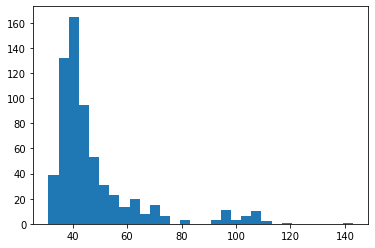

In [17]:
# Histogram of distribution of execution times
plt.hist(train_set[names[0]], bins=30)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f608124f3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f608124fa60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f608124f3a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f60811da430>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f608124f340>],
 'means': []}

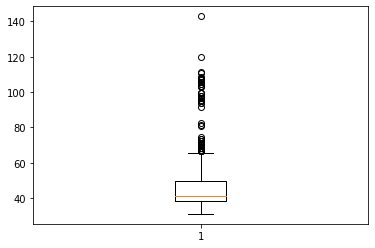

In [18]:
plt.boxplot(train_set[names[0]])

In [19]:
plt.scatter(np.log(train_set[names[0]]), bins=30)

TypeError: scatter() missing 1 required positional argument: 'y'

In [20]:
from scipy.stats import skew, kurtosis
print('Skewness:\n{}'.format(skew(train_set[names[0]]))) 
print('Kurtosis:\n{}'.format(kurtosis(train_set[names[0]]))) 

Skewness:
2.416806168288582
Kurtosis:
6.0460600914349705


{'whiskers': [<matplotlib.lines.Line2D at 0x7f60811b61c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f60811b6850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f60811b6190>],
 'medians': [<matplotlib.lines.Line2D at 0x7f60811c0220>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f60811b6130>],
 'means': []}

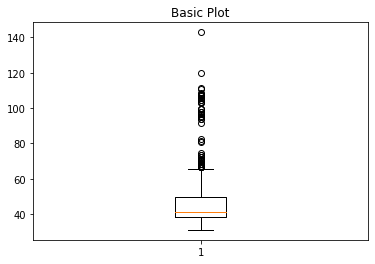

In [21]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(train_set[names[0]])

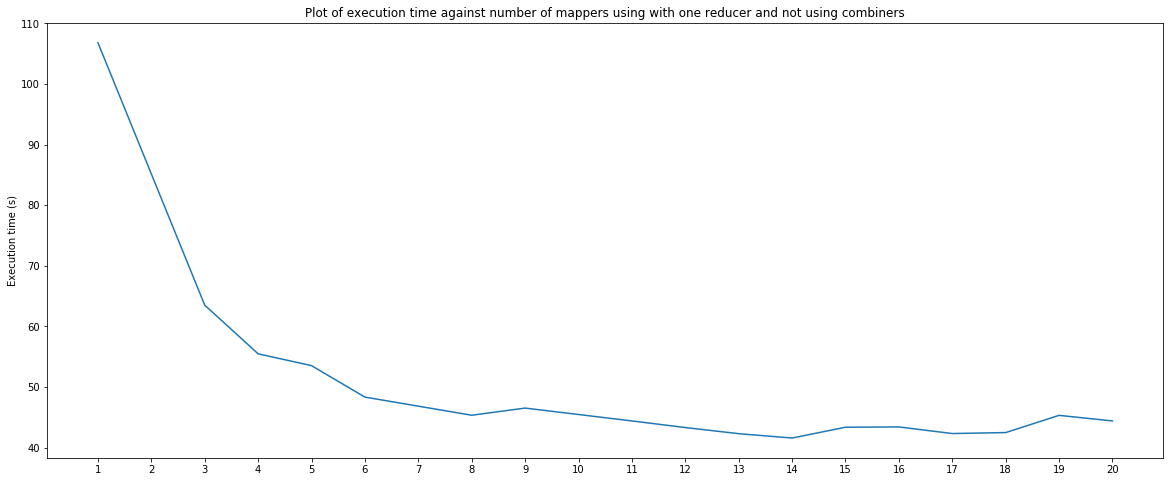

In [22]:
# Plots execution time vs number of mappers for fixed reducers and combiner
def plot_time_vs_mappers(fixed_number_of_reducers, use_combiners, ax):
    cond = (train_set[names[2]] == fixed_number_of_reducers) & (train_set[names[3]] == use_combiners)
    filt = train_set[cond]
    ax.plot(filt[names[1]], filt[names[0]], label=str(fixed_number_of_reducers))
    ax.set_xticks(np.arange(1,21,1))
   

    
fig, ax = plt.subplots(figsize=(20,8))
ax.set_ylabel('Execution time (s)')
ax.set_title('Plot of execution time against number of mappers using with one reducer and not using combiners')
plot_time_vs_mappers(20, False, ax)

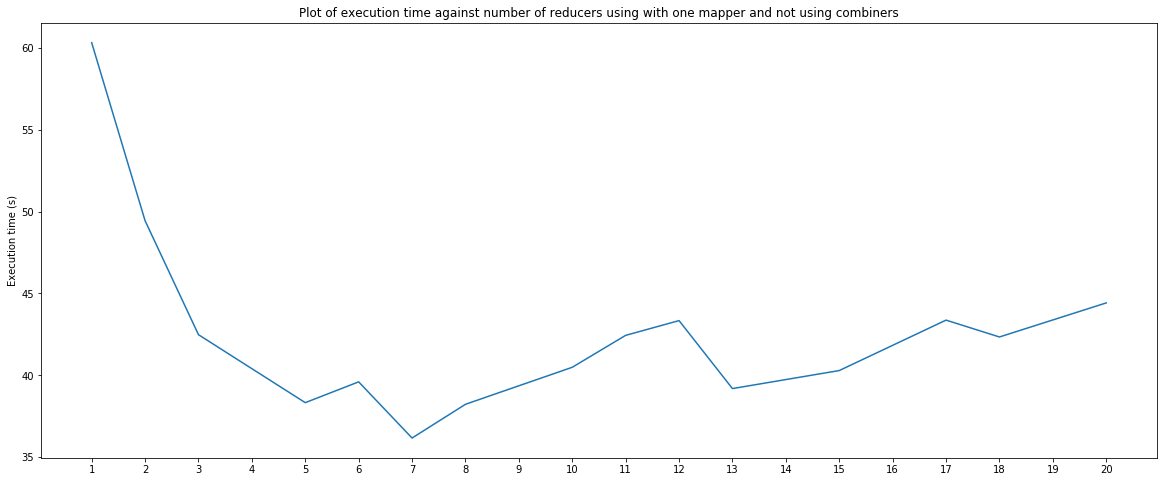

In [23]:
# Plots execution time vs number of reducers for fixed mappers and combiner
def plot_time_vs_reducers(fixed_number_of_mappers, use_combiners, ax):
    cond = (train_set[names[1]] == fixed_number_of_mappers) & (train_set[names[3]] == use_combiners)
    filt = train_set[cond]
    ax.plot(filt[names[2]], filt[names[0]], label=str(fixed_number_of_mappers))
    ax.set_xticks(np.arange(1,21,1))

    
fig, ax = plt.subplots(figsize=(20,8))
ax.set_ylabel('Execution time (s)')
ax.set_title('Plot of execution time against number of reducers using with one mapper and not using combiners')
plot_time_vs_reducers(20, False, ax)

The experiments that where run have three main variables: number of mappers, number of reducers and if a combiner was used. To invesitgate how the number of mappers affects execution time the other two variables (number of reducers and if a combiner was used) have to be held constant. Similairly two invesitgate how executiontime varies with the number of reducers the reamianing variables have to be held constant. <br>

The following graph do the following:
- Plot the execution time against the number of mappers, with constant number of reducers and no combiner.
- Repeat this plot for each number of reducers for a total of 20 plots on the same figure.

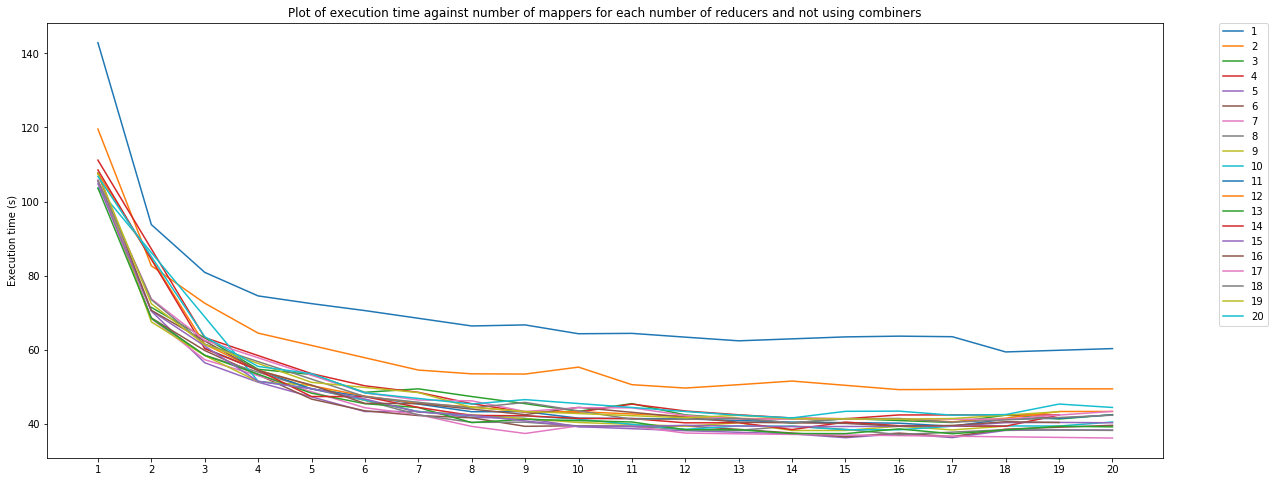

In [24]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_ylabel('Execution time (s)')
ax.set_title('Plot of execution time against number of mappers for each number of reducers and not using combiners')
for i in np.arange(1,21,1):
    plot_time_vs_mappers(i, False, ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

This cell is the oppoisite of the previuous graph:
- Plot the execution time against the number of reducers, with constant number of mappers and no combiner.
- Repeat this plot for each number of mappers for a total of 20 plots on the same figure.

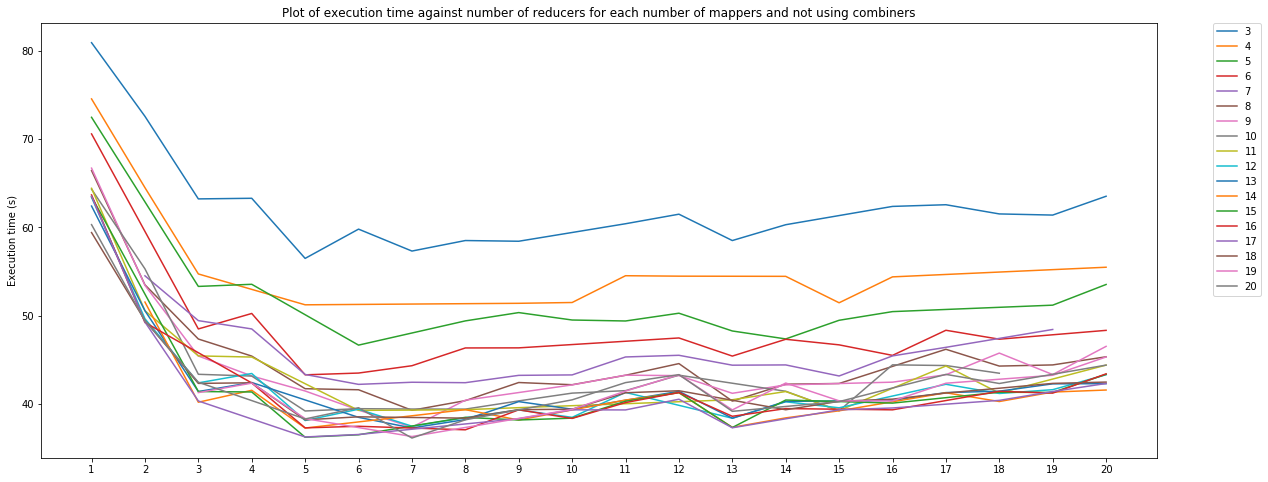

In [25]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_ylabel('Execution time (s)')
ax.set_title('Plot of execution time against number of reducers for each number of mappers and not using combiners')
for i in np.arange(3,21,1):
    plot_time_vs_reducers(i, False, ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    

- The plots in these figures appear to have the same shape with the fixed parameter just scaling the plot. 
- This suggests that the  number of mappers and number of reducers are independant.
- To confirm this seaborn pairplots can be used.
- When investigating execution time as a function of the number of mappers the execution times with each number of mappers can be plotted against the same execution times but with a different number of mappers. 
- eg in the above plot 1 and 10 can be plotted against each other to snure that the plots are correlated.


To make it easier lets define some terminology:
- mapper_frame: execution times for 1-20 mappers with constant number of reducers.
- reducer_frame: execution times for 1-20 reducers with constant number of mappers.
- both assume that the results are either with combiner or without. 


In [26]:
def get_frames(unlocked_variable, locked_variable, combiners):
    '''
    :param locked_variable: the column name that is locked at each iteration. Should be no_of_mappers or no_od_reducers
    :param combiners: wether or not to use combiners
    :return:
        frames: dataframe where each coloumn corresponds to the execution time of one frame
        frames_normalized: dataframe where each column corresponds too the normalized execution times of one frame
        frames_normalized_summary: dataframe of normalized summarys, the summary satistics are caluclated across all frames.
            Coloumn one is the mean normalized execution time and column two is the std of teh normalized execution time for 
            each setting of the unlocked variable.
    '''
    
    # These lists store the frame genrated during each iteration
    temp_frames = []
    temp_frames_normalized = []
    frame_summaries =[]
    
    for i in range(1,21):
        # Filter the dataset to only include those experiments for the desired frame
        condition = (train_set[locked_variable] == i)  & (train_set[names[3]] == combiners)
        filtered = train_set[condition]
        filtered  = filtered.sort_values(by=unlocked_variable)
        filtered = filtered.set_index(filtered[unlocked_variable])
        # Append the ececution times of the frame as well as the normalized execution time of the frames
        temp_frames.append(filtered[names[0]])
        
        frame_mean = filtered[names[0]].mean()
        frame_std = filtered[names[0]].std()
        frame_summaries.append((frame_mean,frame_std))
        
        temp_frames_normalized.append(((filtered[names[0]] - frame_mean)/frame_std))

    frames = pd.concat(temp_frames, axis=1, ignore_index=True)
    print(frames)
    frames_normalized = pd.concat(temp_frames_normalized, axis=1, ignore_index=True)
    frames_normalized_summary = pd.concat((frames_normalized.mean(axis=1), frames_normalized.std(axis=1)), axis=1)
    return frames, frames_normalized, frames_normalized_summary,frame_summaries 



# Define variables for later use
mappers_frames, mapper_norm_frames, mappers_norm_frames_summary_no_combiner, mappers_frames_summary = get_frames(names[1],names[2], False)
reducers_frames, _,reducers_norm_frames_summary_no_combiner, reducers_frames_summary = get_frames(names[2], names[1], False)

_, _, mappers_norm_frames_summary_combiner,_ = get_frames(names[1], names[2], True)
_, _, reducers_norm_frames_summary_combiner,_ = get_frames(names[2],names[1], True)

                    0       1      2       3       4       5       6      7  \
no_of_mappers                                                                 
1              142.88  119.57    NaN  111.18  105.59  105.68  105.63    NaN   
2               93.78   82.67  71.43     NaN   70.42   68.59   68.43  68.52   
3               80.89   72.56  63.22   63.29   56.49   59.80   57.32  58.51   
4               74.53   64.49  54.73     NaN   51.24     NaN     NaN    NaN   
5               72.45     NaN  53.32   53.56     NaN   46.68     NaN  49.42   
6               70.57     NaN  48.51   50.26   43.32   43.52   44.35  46.36   
7                 NaN   54.52  49.45   48.51   43.36   42.24   42.48  42.43   
8               66.42   53.50  47.37   45.44   41.75   41.63   39.31  40.40   
9               66.70   53.44  45.45   43.19   41.49   39.33   37.40  40.45   
10              64.32   55.31  43.38   43.18   39.23   39.49   39.45  39.44   
11              64.42   50.57  45.46   45.33     NaN

A pairplot for the extecution times for 1-20 mappers using 1,5,10,15,20 reducers.

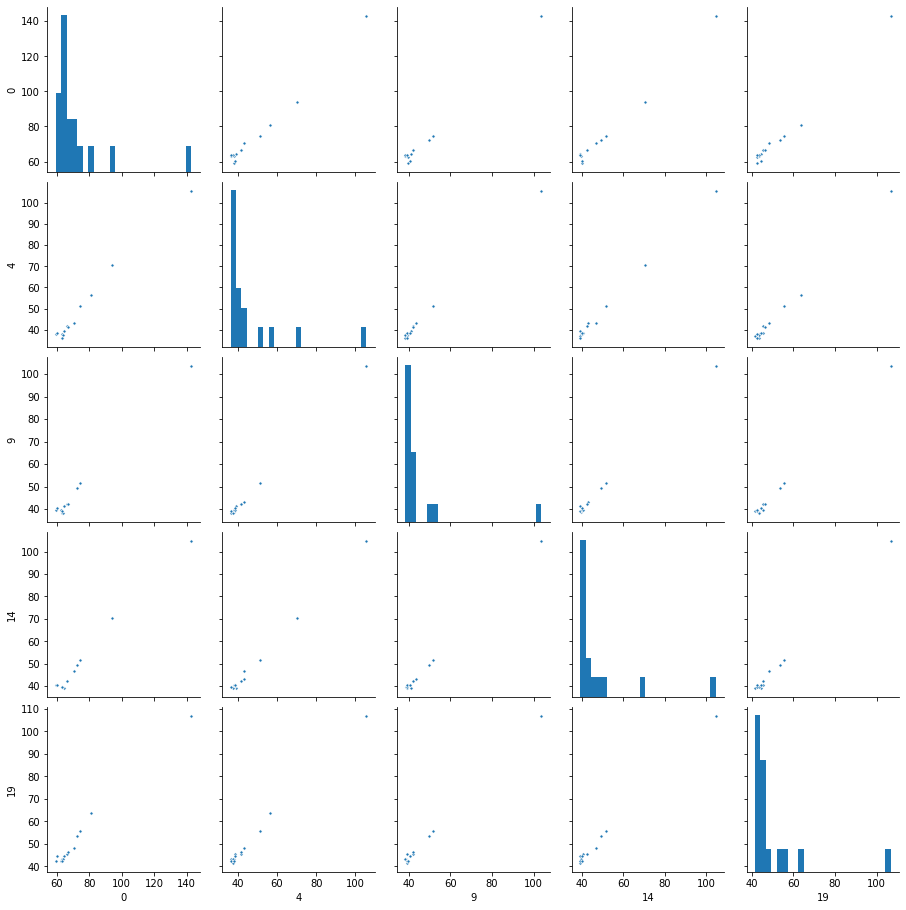

In [27]:

sns.pairplot(mappers_frames, vars = [0,4,9,14,19], \
              plot_kws={'s' : 10}, diag_kws={'bins' : 25}) # Set variables of interest, marker size and bins for histograms
plt.show()


A pairplot for the extecution times for 1-20 reducers using 1,5,10,15,20 mappers.

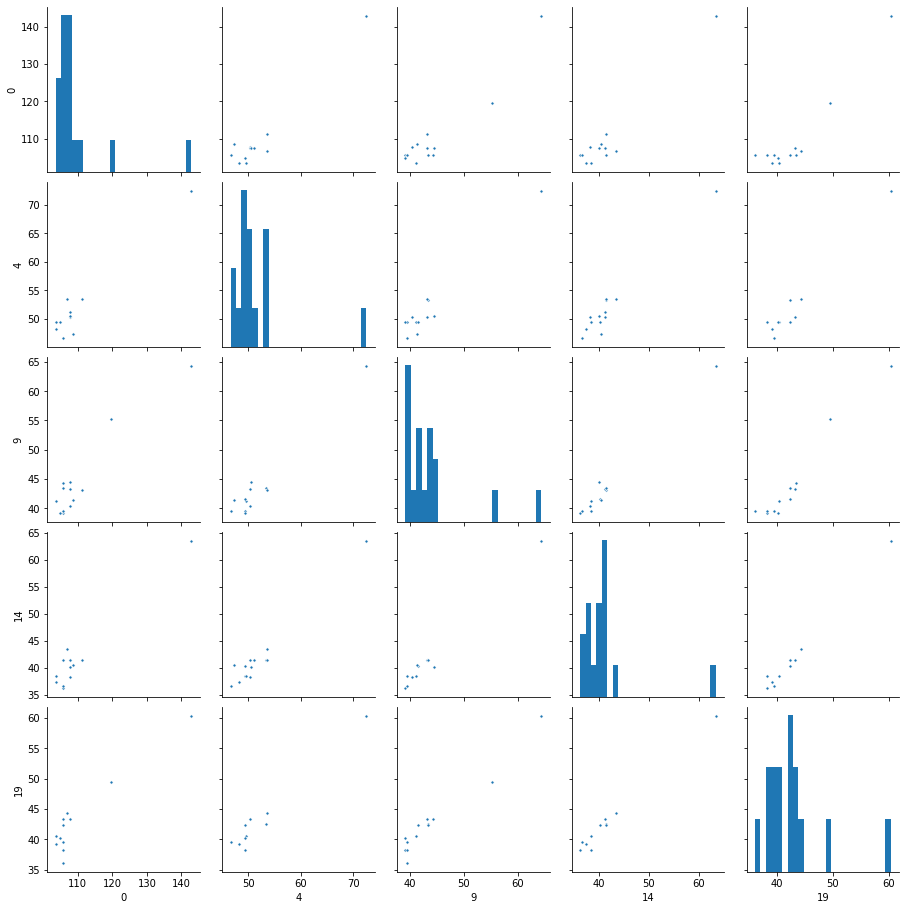

In [28]:

sns.pairplot(reducers_frames, vars = [0,4,9,14,19], \
              plot_kws={'s' : 10}, diag_kws={'bins' : 25}) # Set variables of interest, marker size and bins for histograms
plt.show()

- The first pairplot shows the the execution times when chaning the number of mappers are linealry correlated regardless of the number reducers that where used.
- The second pairplot shows the the execution times when chaning the number of reducers are correlated but more noisey when the number mappers used changes.
- To this end we will use the normalized summary drames earlier to create bar charts.

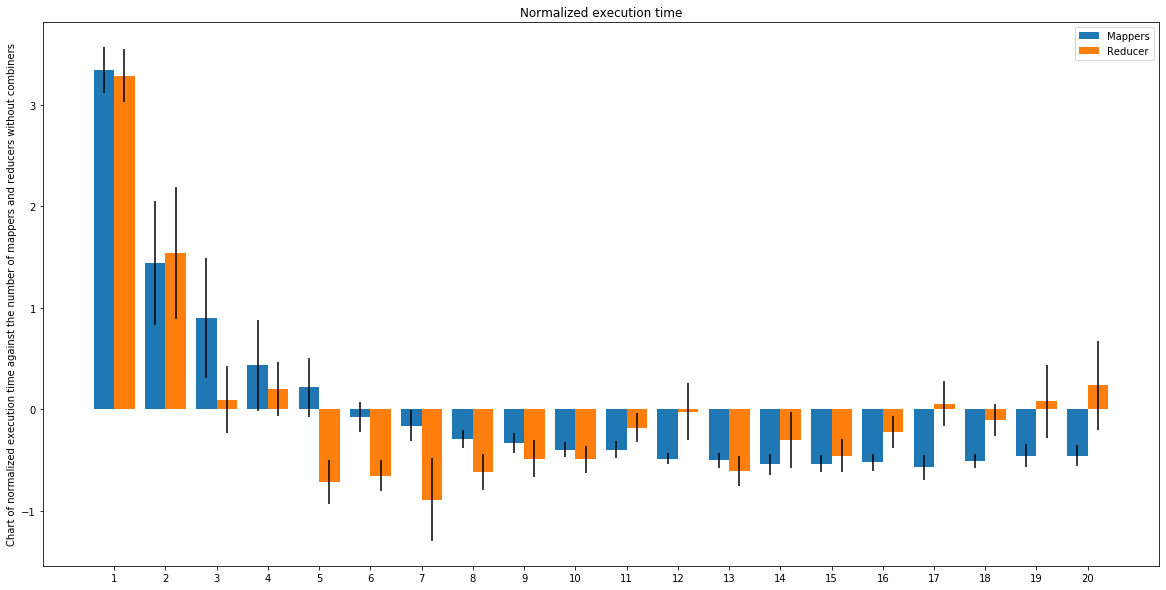

In [29]:
labels = np.arange(1,21)
width = 0.40

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(labels - width/2, mappers_norm_frames_summary_no_combiner[0], width, label='Mappers', yerr=mappers_norm_frames_summary_no_combiner[1] )
rects2 = ax.bar(labels + width/2, reducers_norm_frames_summary_no_combiner[0], width, label='Reducer', yerr=reducers_norm_frames_summary_no_combiner[1])


ax.set_ylabel('Chart of normalized execution time against the number of mappers and reducers without combiners')
ax.set_title('Normalized execution time')
ax.set_xticks(labels)
ax.set_xticklabels(labels)
ax.legend()

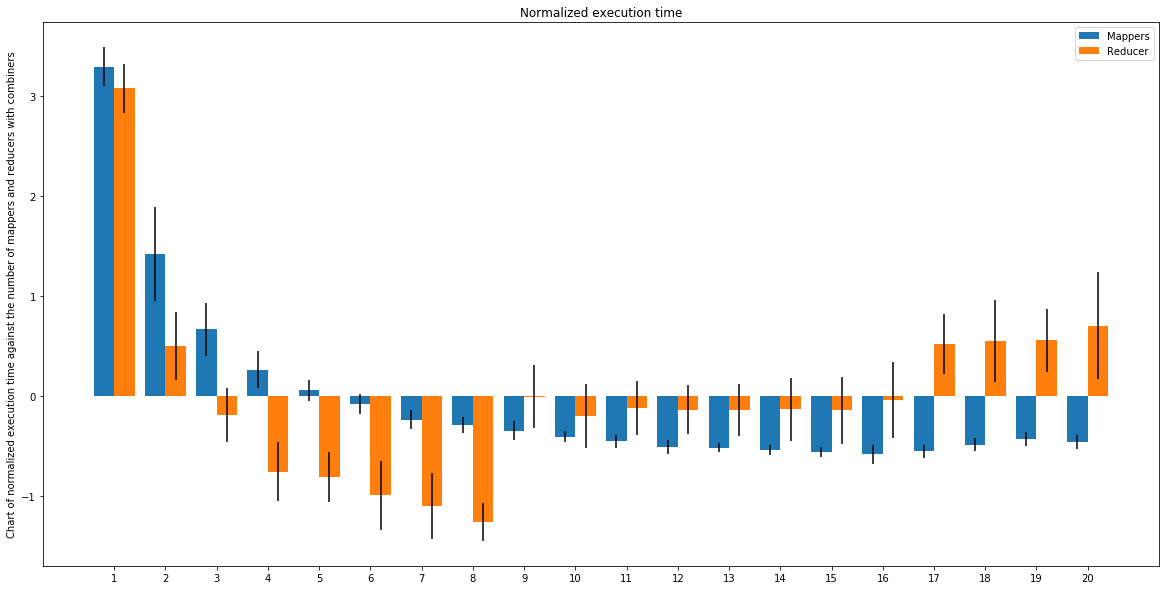

In [30]:
labels = np.arange(1,21)
width = 0.40

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(labels - width/2, mappers_norm_frames_summary_combiner[0], width, label='Mappers', yerr=mappers_norm_frames_summary_combiner[1] )
rects2 = ax.bar(labels + width/2, reducers_norm_frames_summary_combiner[0], width, label='Reducer', yerr=reducers_norm_frames_summary_combiner[1])


ax.set_ylabel('Chart of normalized execution time against the number of mappers and reducers with combiners')
ax.set_title('Normalized execution time')
ax.set_xticks(labels)
ax.set_xticklabels(labels)
ax.legend()

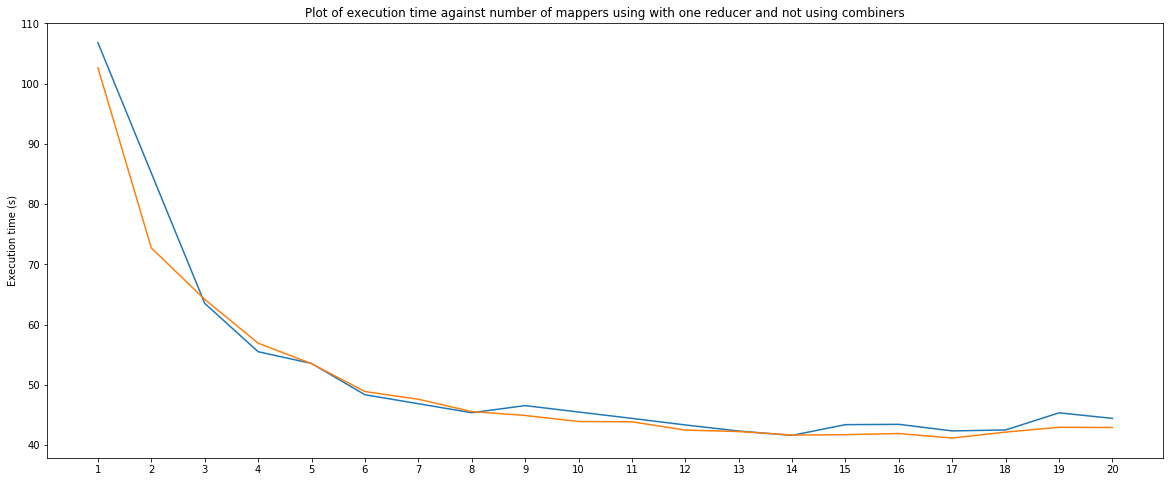

In [31]:
number_of_reducers = 20
fig, ax = plt.subplots(figsize=(20,8))
ax.set_ylabel('Execution time (s)')
ax.set_title('Plot of execution time against number of mappers using with one reducer and not using combiners')
plot_time_vs_mappers(number_of_reducers, False, ax)
mappers_frames_summary
reconstructed = (mappers_norm_frames_summary_no_combiner[0]*mappers_frames_summary[number_of_reducers-1][1]) + mappers_frames_summary[number_of_reducers-1][0]
ax.plot(np.arange(1,21,1), reconstructed)


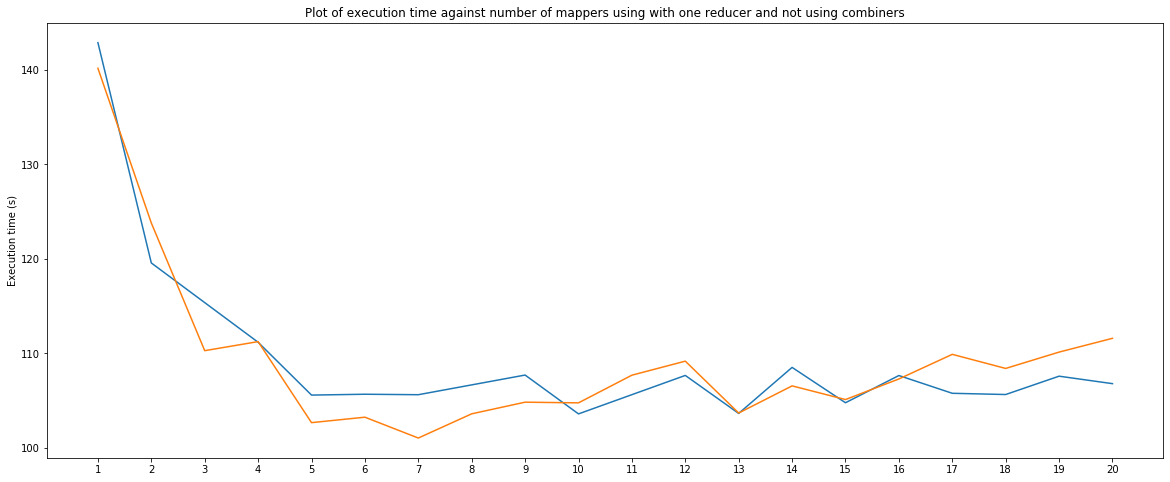

In [32]:
number_of_mappers = 1
fig, ax = plt.subplots(figsize=(20,8))
ax.set_ylabel('Execution time (s)')
ax.set_title('Plot of execution time against number of mappers using with one reducer and not using combiners')
plot_time_vs_reducers(number_of_mappers, False, ax)
mappers_frames_summary
reconstructed = (reducers_norm_frames_summary_no_combiner[0]*reducers_frames_summary[number_of_mappers-1][1]) + reducers_frames_summary[number_of_mappers-1][0]
ax.plot(np.arange(1,21,1), reconstructed)